In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FYP/FYP.csv", encoding='latin-1')
# encoding='latin-1', encoding='utf-8'
df

,Comment,Platform
0,"Disappointed. While it is lovely to look at, a...",Maps
1,The place is nice but the Indian lady very rud...,Maps
2,"Tourist trap , apparently women have to be cov...",Maps
3,I wouldnt recommend the place at all. It is ve...,Maps
4,Really feeling very bad. Where is our culture ...,Maps
...,...,...
16348,NaN,Tiktok
16349,NaN,Tiktok
16350,food in malaysia is Overpriced,Tiktok
16351,NaN,Tiktok


Data Cleaning

In [ ]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [ ]:
import re

def remove_urls(text):
  """
  Removes URLs from a string.
  """
  if not isinstance(text, str):
    text = str(text)
  url_pattern = r"https?://\S+"
  return re.sub(url_pattern, '', text)

df['Comment1'] = df['Comment'].apply(remove_urls)

In [ ]:
# Define a regular expression to match unknown characters
unknown_char_regex = re.compile(r'[^a-zA-Z0-9\s\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U000024C2-\U0001F251]')

# Function to remove unknown characters
def remove_unknown_chars(text):
    return unknown_char_regex.sub('', str(text))

# Apply the function to the "Comment" column
df["Comment1"] = df["Comment1"].apply(lambda x: remove_unknown_chars(x))
df


,Comment,Platform,Comment1
0,"Disappointed. While it is lovely to look at, a...",Maps,Disappointed While it is lovely to look at and...
1,The place is nice but the Indian lady very rud...,Maps,The place is nice but the Indian lady very rud...
2,"Tourist trap , apparently women have to be cov...",Maps,Tourist trap apparently women have to be cove...
3,I wouldnt recommend the place at all. It is ve...,Maps,I wouldnt recommend the place at all It is ver...
4,Really feeling very bad. Where is our culture ...,Maps,Really feeling very bad Where is our culture g...
...,...,...,...
16343,Crowding in the empty space,Tiktok,Crowding in the empty space
16344,Quite boring...,Tiktok,Quite boring
16346,Very disappointed with the visit.,Tiktok,Very disappointed with the visit
16350,food in malaysia is Overpriced,Tiktok,food in malaysia is Overpriced


In [ ]:
import string

def remove_punctuation(text):
  """
  Removes punctuation marks, symbols, and extraneous numbers from a string.
  """
  # Define punctuation and symbols to be removed
  punctuation = string.punctuation
  symbols = "!@#$%^&*()_-+=`~,./?<>|"
  numbers = "0123456789"

  # Remove punctuation, symbols, and numbers
  text = ''.join([char for char in text if char not in punctuation + symbols + numbers])

  return text

# Apply the function to the "Content" column
df['Comment1'] = df['Comment1'].apply(remove_punctuation)
df

,Comment,Platform,Comment1
0,"Disappointed. While it is lovely to look at, a...",Maps,Disappointed While it is lovely to look at and...
1,The place is nice but the Indian lady very rud...,Maps,The place is nice but the Indian lady very rud...
2,"Tourist trap , apparently women have to be cov...",Maps,Tourist trap apparently women have to be cove...
3,I wouldnt recommend the place at all. It is ve...,Maps,I wouldnt recommend the place at all It is ver...
4,Really feeling very bad. Where is our culture ...,Maps,Really feeling very bad Where is our culture g...
...,...,...,...
16343,Crowding in the empty space,Tiktok,Crowding in the empty space
16344,Quite boring...,Tiktok,Quite boring
16346,Very disappointed with the visit.,Tiktok,Very disappointed with the visit
16350,food in malaysia is Overpriced,Tiktok,food in malaysia is Overpriced


In [ ]:
# Convert text column to lowercase
df['Comment1'] = df['Comment1'].str.lower()

# Remove duplicates from the entire dataset
df.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
df.reset_index(drop=True, inplace=True)

df

,Comment,Platform,Comment1
0,"Disappointed. While it is lovely to look at, a...",Maps,disappointed while it is lovely to look at and...
1,The place is nice but the Indian lady very rud...,Maps,the place is nice but the indian lady very rud...
2,"Tourist trap , apparently women have to be cov...",Maps,tourist trap apparently women have to be cove...
3,I wouldnt recommend the place at all. It is ve...,Maps,i wouldnt recommend the place at all it is ver...
4,Really feeling very bad. Where is our culture ...,Maps,really feeling very bad where is our culture g...
...,...,...,...
14964,Crowding in the empty space,Tiktok,crowding in the empty space
14965,Quite boring...,Tiktok,quite boring
14966,Very disappointed with the visit.,Tiktok,very disappointed with the visit
14967,food in malaysia is Overpriced,Tiktok,food in malaysia is overpriced


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if necessary
nltk.download('stopwords')

# Get the list of stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Define stopwords to retain
stopwords_to_retain = {
    'not', 'no', 'never', 'none', 'neither', 'nor', 'nothing', 'nobody', 'nowhere', 'too',
    'but', 'however', 'although', 'though', 'even though', 'yet', 'still', 'despite',
    'very', 'too', 'enough', 'quite', 'rather', 'almost', 'if', 'unless', 'cant'
}

# Remove the stopwords to retain from the main stopwords list
final_stop_words = stop_words - stopwords_to_retain

def remove_stopwords(text):
    """
    Removes stopwords from a string while retaining important ones.
    """
    words = text.split()
    filtered_words = [word for word in words if word not in final_stop_words]
    return ' '.join(filtered_words)

# Apply the function to the "Comment" column
df['Comment1'] = df['Comment1'].apply(remove_stopwords)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comment,Platform,Comment1
0,"Disappointed. While it is lovely to look at, a...",Maps,disappointed lovely look beyond doubt magnific...
1,The place is nice but the Indian lady very rud...,Maps,place nice but indian lady very rude said long...
2,"Tourist trap , apparently women have to be cov...",Maps,tourist trap apparently women coveted legs arm...
3,I wouldnt recommend the place at all. It is ve...,Maps,wouldnt recommend place very dirty smelly garb...
4,Really feeling very bad. Where is our culture ...,Maps,really feeling very bad culture going im reall...
...,...,...,...
14964,Crowding in the empty space,Tiktok,crowding empty space
14965,Quite boring...,Tiktok,quite boring
14966,Very disappointed with the visit.,Tiktok,very disappointed visit
14967,food in malaysia is Overpriced,Tiktok,food malaysia overpriced


Tokenize

In [ ]:
# Download punkt tokenizer if necessary
nltk.download('punkt')

# Define a function to tokenize text
def tokenize(text):
  """
  Tokenizes a string into individual words.
  """
  tokenizer = nltk.word_tokenize(text)
  return tokenizer

# Apply the function to a column containing text
df['Comment1'] = df['Comment1'].apply(tokenize)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Comment,Platform,Comment1
0,"Disappointed. While it is lovely to look at, a...",Maps,"[disappointed, lovely, look, beyond, doubt, ma..."
1,The place is nice but the Indian lady very rud...,Maps,"[place, nice, but, indian, lady, very, rude, s..."
2,"Tourist trap , apparently women have to be cov...",Maps,"[tourist, trap, apparently, women, coveted, le..."
3,I wouldnt recommend the place at all. It is ve...,Maps,"[wouldnt, recommend, place, very, dirty, smell..."
4,Really feeling very bad. Where is our culture ...,Maps,"[really, feeling, very, bad, culture, going, i..."
...,...,...,...
14964,Crowding in the empty space,Tiktok,"[crowding, empty, space]"
14965,Quite boring...,Tiktok,"[quite, boring]"
14966,Very disappointed with the visit.,Tiktok,"[very, disappointed, visit]"
14967,food in malaysia is Overpriced,Tiktok,"[food, malaysia, overpriced]"


Lemmatize

In [ ]:
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('wordnet')

# Create WordNetLemmatizer instance
lemmatizer = WordNetLemmatizer()

# Define function to lemmatize tokens
def lemmatize(tokens):
    lemmatized_tokens = []
    for token in tokens:
        lemmatized_token = None
        for pos in ['n', 'v', 'a', 'r']:
            lemmatized_token = lemmatizer.lemmatize(token, pos=pos)
            if lemmatized_token != token:
                break
        lemmatized_tokens.append(lemmatized_token)
    return ' '.join(lemmatized_tokens)

# Apply lemmatization to the tokenized column
df['lemmatized_text'] = df['Comment1'].apply(lambda x: lemmatize(x))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Comment,Platform,Comment1,lemmatized_text
0,"Disappointed. While it is lovely to look at, a...",Maps,"[disappointed, lovely, look, beyond, doubt, ma...",disappoint lovely look beyond doubt magnificen...
1,The place is nice but the Indian lady very rud...,Maps,"[place, nice, but, indian, lady, very, rude, s...",place nice but indian lady very rude say long ...
2,"Tourist trap , apparently women have to be cov...",Maps,"[tourist, trap, apparently, women, coveted, le...",tourist trap apparently woman covet leg arm ye...
3,I wouldnt recommend the place at all. It is ve...,Maps,"[wouldnt, recommend, place, very, dirty, smell...",wouldnt recommend place very dirty smelly garb...
4,Really feeling very bad. Where is our culture ...,Maps,"[really, feeling, very, bad, culture, going, i...",really feel very bad culture go im really feel...
...,...,...,...,...
14964,Crowding in the empty space,Tiktok,"[crowding, empty, space]",crowd empty space
14965,Quite boring...,Tiktok,"[quite, boring]",quite bore
14966,Very disappointed with the visit.,Tiktok,"[very, disappointed, visit]",very disappoint visit
14967,food in malaysia is Overpriced,Tiktok,"[food, malaysia, overpriced]",food malaysia overprice


TextBlob

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

# Define custom words with their sentiment scores
custom_words = {
    # Destination related
    'beautiful': 2.0, 'scenic': 2.0, 'picturesque': 2.0, 'breathtaking': 2.0, 'boring': -2.0, 'unattractive': -2.0, 'ordinary': -1.5,
    'unsafe': -2.0, 'overrated': -2.0, 'interesting': 1.5, 'peaceful': 1.5, 'crowded': -1.5, 'dirty': -1.5, 'polluted': -2.0, 'pickpocket': -2.0,
    'mismanagement': -1.5, 'waiting': -1.5, 'decent': -1.0, 'hot': -2.0, 'rubbish': -2.0, 'stinky': -2.0, 'busy': -1.5, 'noisy': -2.0,

    # Infrastructure related
    'modern': 2.0, 'clean': 2.0, 'efficient': 2.0, 'well-maintained': 2.0, 'poor': -2.0, 'dirty': -2.0, 'dangerous': -2.0,
    'inefficient': -2.0, 'old': -1.5, 'broken': -2.0, 'convenient': 1.5, 'accessible': 1.5, 'luxurious': 2.0, 'comfortable': 1.5,
    'waste': -2.0, 'poorly': -2.0, 'overdeveloped': -2.0, 'safety': 1.5, 'shabby': -2.0,

    # Food related
    'delicious': 2.0, 'tasty': 2.0, 'flavorful': 2.0, 'authentic': 2.0, 'gourmet': 2.0, 'savory': 1.5, 'spicy': 1.5, 'too spicy': -1.5,
    'bland': -2.0, 'tasteless': -2.0, 'expensive': -2.0, 'bad': -2.0, 'unhygienic': -2.0, 'disgusting': -2.0, 'stale': -2.0, 'slow': -1.5,
    'affordable': 1.5, 'cheap': 1.5, 'fresh': 2.0, 'greasy': -1.5, 'pricey': -2.0, 'overprice': -2.0, 'overpriced': -2.0, 'over price': -2.0,
    'plain': -1.5,

    # Culture related
    'friendly': 2.0, 'welcoming': 2.0, 'religious': 1.5, 'diverse': 2.0, 'rich': 2.0, 'vibrant': 2.0, 'unfriendly': -2.0,
    'intolerant': -2.0, 'boring': -2.0, 'offensive': -2.0, 'polite': 1.5, 'helpful': 1.5, 'rude': -1.5, 'disrespectful': -2.0
}

# Define a function to adjust sentiment scores based on custom words
def custom_sentiment_analysis(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Adjust polarity based on custom words
    words = text.lower().split()
    for word in words:
        if word in custom_words:
            polarity += custom_words[word]

    # Determine sentiment class label (positive, negative, or neutral)
    if polarity > 0.1:
        sentiment_class = 'positive'
    elif polarity < -0.1:
        sentiment_class = 'negative'
    else:
        sentiment_class = 'neutral'

    # Normalize the polarity to match a 1-5 rating scale
    sentiment_range = round((polarity + 1) * 2.5 + 1)
    sentiment_range = max(1, min(sentiment_range, 5))

    return sentiment_class, polarity, sentiment_range

# Convert to string
df['lemmatized_text'] = df['lemmatized_text'].astype(str)

# Apply the function to each text in the dataset
df[['Sentiment_Class', 'Sentiment_Score', 'Sentiment_Range']] = df['lemmatized_text'].apply(lambda x: pd.Series(custom_sentiment_analysis(x)))

# View the updated DataFrame
df


,Comment,Platform,Comment1,lemmatized_text,Sentiment_Class,Sentiment_Score,Sentiment_Range
0,"Disappointed. While it is lovely to look at, a...",Maps,"[disappointed, lovely, look, beyond, doubt, ma...",disappoint lovely look beyond doubt magnificen...,negative,-1.6125,1
1,The place is nice but the Indian lady very rud...,Maps,"[place, nice, but, indian, lady, very, rude, s...",place nice but indian lady very rude say long ...,negative,-3.5925,1
2,"Tourist trap , apparently women have to be cov...",Maps,"[tourist, trap, apparently, women, coveted, le...",tourist trap apparently woman covet leg arm ye...,neutral,0.0250,4
3,I wouldnt recommend the place at all. It is ve...,Maps,"[wouldnt, recommend, place, very, dirty, smell...",wouldnt recommend place very dirty smelly garb...,negative,-0.8575,1
4,Really feeling very bad. Where is our culture ...,Maps,"[really, feeling, very, bad, culture, going, i...",really feel very bad culture go im really feel...,negative,-2.1275,1
...,...,...,...,...,...,...,...
14964,Crowding in the empty space,Tiktok,"[crowding, empty, space]",crowd empty space,neutral,-0.1000,3
14965,Quite boring...,Tiktok,"[quite, boring]",quite bore,neutral,0.0000,4
14966,Very disappointed with the visit.,Tiktok,"[very, disappointed, visit]",very disappoint visit,positive,0.2000,4
14967,food in malaysia is Overpriced,Tiktok,"[food, malaysia, overpriced]",food malaysia overprice,negative,-2.0000,1


VADER

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define custom words and their sentiment scores
custom_words = {
    # Destination related
    'beautiful': 2.0, 'scenic': 2.0, 'picturesque': 2.0, 'breathtaking': 2.0, 'boring': -2.0, 'unattractive': -2.0, 'ordinary': -1.5,
    'unsafe': -2.0, 'overrated': -2.0, 'interesting': 1.5, 'peaceful': 1.5, 'crowded': -1.5, 'dirty': -1.5, 'polluted': -2.0, 'pickpocket': -2.0,
    'crowded': -2.0, 'mismanagement': -1.5, 'waiting': -1.5, 'ordnary': -1.5, 'decent': -1.0, 'hot': -2.0, 'clean': 2.0, 'rubbish': -2.0, 'stinky': -2.0,
    'busy': -1.5, 'noisy': -2.0,

    # Infrastructure related
    'modern': 2.0, 'clean': 2.0, 'efficient': 2.0, 'well-maintained': 2.0, 'poor': -2.0, 'dirty': -2.0, 'dangerous': -2.0,
    'inefficient': -2.0, 'old': -1.5, 'broken': -2.0, 'crowded': -1.5, 'convenient': 1.5, 'accessible': 1.5, 'luxurious': 2.0,
    'comfortable': 1.5, 'waste': -2.0, 'poorly': -2.0, 'overdeveloped': -2.0, 'safety': 1.5, 'shabby': -2.0,

    # Food related
    'delicious': 2.0, 'tasty': 2.0, 'flavorful': 2.0, 'authentic': 2.0, 'gourmet': 2.0, 'savory': 1.5, 'spicy': 1.5, 'too spicy': -1.5,
    'bland': -2.0, 'tasteless': -2.0, 'expensive': -2.0, 'bad': -2.0, 'unhygienic': -2.0, 'disgusting': -2.0, 'stale': -2.0, 'slow': -1.5,
    'affordable': 1.5, 'cheap': 1.5, 'fresh': 2.0, 'greasy': -1.5, 'pricey': -2.0, 'overprice': -2.0, 'overpriced': -2.0,  'over price': -2.0,
    'plain': -1.5,

    # Culture related
    'friendly': 2.0, 'welcoming': 2.0, 'religious': 1.5, 'diverse': 2.0, 'rich': 2.0, 'vibrant': 2.0, 'unfriendly': -2.0,
    'intolerant': -2.0, 'boring': -2.0, 'offensive': -2.0, 'polite': 1.5, 'helpful': 1.5, 'rude': -1.5, 'disrespectful': -2.0
}

# Update VADER's lexicon with custom words
sia.lexicon.update(custom_words)

# Define a function to perform sentiment analysis
def sentiment_analysis(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    # sentiment class label
    if compound_score >= 0.1:
        sentiment_class = 'positive'
    elif compound_score <= -0.1:
        sentiment_class = 'negative'
    else:
        sentiment_class = 'neutral'

    # Map compound score to a range of 1-5
    sentiment_range = round((compound_score + 1) * 2.5 + 1)
    if sentiment_range < 1:
        sentiment_range = 1
    elif sentiment_range > 5:
        sentiment_range = 5

    return sentiment_class, compound_score, sentiment_range

# Convert to string
df['lemmatized_text'] = df['lemmatized_text'].astype(str)

# Apply the function to each text in the dataset
df[['Sentiment_Class', 'Sentiment_Score', 'Sentiment_Range']] = df['lemmatized_text'].apply(lambda x: pd.Series(sentiment_analysis(x)))

# View the updated DataFrame
df


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Comment,Platform,Comment1,lemmatized_text,Sentiment_Class,Sentiment_Score,Sentiment_Range
0,"Disappointed. While it is lovely to look at, a...",Maps,"[disappointed, lovely, look, beyond, doubt, ma...",disappoint lovely look beyond doubt magnificen...,positive,0.1779,4
1,The place is nice but the Indian lady very rud...,Maps,"[place, nice, but, indian, lady, very, rude, s...",place nice but indian lady very rude say long ...,negative,-0.9041,1
2,"Tourist trap , apparently women have to be cov...",Maps,"[tourist, trap, apparently, women, coveted, le...",tourist trap apparently woman covet leg arm ye...,negative,-0.1027,3
3,I wouldnt recommend the place at all. It is ve...,Maps,"[wouldnt, recommend, place, very, dirty, smell...",wouldnt recommend place very dirty smelly garb...,negative,-0.2386,3
4,Really feeling very bad. Where is our culture ...,Maps,"[really, feeling, very, bad, culture, going, i...",really feel very bad culture go im really feel...,negative,-0.2956,3
...,...,...,...,...,...,...,...
14964,Crowding in the empty space,Tiktok,"[crowding, empty, space]",crowd empty space,negative,-0.2023,3
14965,Quite boring...,Tiktok,"[quite, boring]",quite bore,negative,-0.3167,3
14966,Very disappointed with the visit.,Tiktok,"[very, disappointed, visit]",very disappoint visit,negative,-0.4576,2
14967,food in malaysia is Overpriced,Tiktok,"[food, malaysia, overpriced]",food malaysia overprice,negative,-0.4588,2


BERT

In [ ]:
# Ensure proper installation
!pip uninstall -y transformers torch accelerate
!pip install transformers[torch] torch
!pip install --upgrade accelerate


Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Successfully uninstalled transformers-4.41.2
Found existing installation: torch 2.3.0+cu121
Uninstalling torch-2.3.0+cu121:
  Successfully uninstalled torch-2.3.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 40.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_6

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
import torch

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenize and encode the texts
def tokenize_and_encode(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

# Convert sentiment classes to numeric labels
label_map = {'positive': 2, 'neutral': 1, 'negative': 0}
labels = df['Sentiment_Class'].map(label_map).values

# Split the data
train_texts, test_texts, train_labels, test_labels = train_test_split(df['lemmatized_text'].tolist(), labels, test_size=0.1, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)

# Tokenize and encode the texts
train_encodings = tokenize_and_encode(train_texts)
val_encodings = tokenize_and_encode(val_texts)
test_encodings = tokenize_and_encode(test_texts)

# Create datasets
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,  # Start with 3 epochs, can increase if needed
    per_device_train_batch_size=16,  # Increase if possible
    per_device_eval_batch_size=16,
    warmup_steps=50,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Ensure this matches evaluation_strategy
    load_best_model_at_end=True,
    fp16=True,  # Enable mixed precision training
    save_total_limit=1,
)

# Define the compute_metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1

    }

# Initialize the Trainer with compute_metrics and early stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Stop if no improvement for 3 epochs
)

# Train the model
trainer.train()

# Evaluate the model on the validation set
val_result = trainer.evaluate(eval_dataset=val_dataset)
print(f"Validation results: {val_result}")

# Evaluate the model on the test set
test_result = trainer.evaluate(eval_dataset=test_dataset)
print(f"Test results: {test_result}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.400000,0.378995,0.857143,0.855220,0.857143,0.855979
2,0.231700,0.422536,0.888199,0.891543,0.888199,0.889569
3,0.134100,0.484841,0.875776,0.883616,0.875776,0.878192
4,0.048900,0.515039,0.873706,0.889922,0.873706,0.878822


Validation results: {'eval_loss': 0.37899497151374817, 'eval_accuracy': 0.8571428571428571, 'eval_precision': 0.8552204844013995, 'eval_recall': 0.8571428571428571, 'eval_f1': 0.8559788449558804, 'eval_runtime': 0.4932, 'eval_samples_per_second': 979.258, 'eval_steps_per_second': 62.851, 'epoch': 4.0}
Test results: {'eval_loss': 0.4338627755641937, 'eval_accuracy': 0.8656716417910447, 'eval_precision': 0.8648923080622665, 'eval_recall': 0.8656716417910447, 'eval_f1': 0.8618791602662569, 'eval_runtime': 0.516, 'eval_samples_per_second': 1038.793, 'eval_steps_per_second': 65.894, 'epoch': 4.0}


SVM (Percentage Split)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

text = df['lemmatized_text'].tolist()  # Get text data as a list
labels = df['Sentiment_Class'].tolist()  # Get sentiment class labels

vectorizer = TfidfVectorizer(max_features=1000)  # Reduce dimensions (optional)
features = vectorizer.fit_transform(text)  # Generate TF-IDF features

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Choose linear kernel for simplicity (adjust as needed)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print various evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8171641791044776
Precision: 0.8191359285452351
Recall: 0.8171641791044776
F1-Score: 0.8156055964398573


SVM (Cross Validation)

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Prepare the data
text = df['lemmatized_text'].tolist()  # Get text data as a list
labels = df['Sentiment_Class'].tolist()  # Get sentiment class labels

vectorizer = TfidfVectorizer(max_features=1000)  # Reduce dimensions (optional)
features = vectorizer.fit_transform(text)  # Generate TF-IDF features

# Convert labels to a numeric format
label_map = {'positive': 2, 'neutral': 1, 'negative': 0}
numeric_labels = np.array([label_map[label] for label in labels])

# Define the model
svm_model = SVC(kernel='linear')

# Define the k-fold cross-validation
kf = StratifiedKFold(n_splits=20)  # Change the number of splits as needed

# Initialize lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features, numeric_labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = numeric_labels[train_index], numeric_labels[test_index]

    # Train the model
    svm_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate and store the metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Print the average metrics across all folds
print("Accuracy:", np.mean(accuracy_scores))
print("Precision:", np.mean(precision_scores))
print("Recall:", np.mean(recall_scores))
print("F1-Score:", np.mean(f1_scores))


Accuracy: 0.9032811244979919
Precision: 0.9063748323461496
Recall: 0.9032811244979919
F1-Score: 0.8998834792175862


NB (Percentage Split)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

text = df['lemmatized_text'].tolist()  # Get text data as a list
labels = df['Sentiment_Class'].tolist()  # Get sentiment class labels

vectorizer = TfidfVectorizer(max_features=1000)  # Reduce dimensions (optional)
features = vectorizer.fit_transform(text)  # Generate TF-IDF features

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

#Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = nb_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print various evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.6958955223880597
Precision: 0.6810782304101023
Recall: 0.6958955223880597
F1-Score: 0.6530671688983911


NB (Cross Validation)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Prepare the data
text = df['lemmatized_text'].tolist()  # Get text data as a list
labels = df['Sentiment_Class'].tolist()  # Get sentiment class labels

vectorizer = TfidfVectorizer(max_features=1000)  # Reduce dimensions (optional)
features = vectorizer.fit_transform(text)  # Generate TF-IDF features

# Convert labels to a numeric format
label_map = {'positive': 2, 'neutral': 1, 'negative': 0}
numeric_labels = np.array([label_map[label] for label in labels])

# Define the model
nb_model = MultinomialNB()

# Define the k-fold cross-validation
kf = StratifiedKFold(n_splits=20)  # Change the number of splits as needed

# Initialize lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features, numeric_labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = numeric_labels[train_index], numeric_labels[test_index]

    # Train the model
    nb_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = nb_model.predict(X_test)

    # Calculate and store the metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Print the average metrics across all folds
print("Accuracy:", np.mean(accuracy_scores))
print("Precision:", np.mean(precision_scores))
print("Recall:", np.mean(recall_scores))
print("F1-Score:", np.mean(f1_scores))

Accuracy: 0.8178152610441767
Precision: 0.8265319734290149
Recall: 0.8178152610441767
F1-Score: 0.8059138094151728


Factorize

In [ ]:
import pandas as pd

# Define functions to tag reviews
def tag_destination(review):
    keywords = [
        "destination", "destinations", "location", "locations" "place","places", "spot", "spots",
        "attraction", "attractions", "city", "town", "area", "region", "regions" "village", "sightseeing",
        "beautiful", "scenic", "picturesque", "breathtaking", "popular", "nice", "wonderful", "island",
        "nature", "natural", "boring", "unattractive", "unsafe", "overrated", "paradise",
        "kuala lumpur", "george town", "penang", "langkawi", "kota kinabalu", "taiping",
        "malacca", "melaka", "johor bahru", "ipoh", "pangkor",  "pulau mabul",
        "cameron highlands", "tioman island", "genting highlands", "putrajaya",
        "borneo", "mount kinabalu", "perhentian islands", "redang island",
        "taman negara", "fraser's hill", "sepang", "labuan", "pulau sipadan"
    ]
    return 1 if any(keyword in review.lower() for keyword in keywords) else 0

def tag_infrastructure(review):
    keywords = [
        "infrastructure", "facility", "amenity", "transportation", "roads", "bridges", "hospitable", "projects"
        "airports", "airport", "railways", "transport", "public transport", "hotels", "accommodation", "resort", "ecosystem", "city", "cities",
        "modern", "modernity", "wi-fi", "Wi-Fi", "clean", "efficient", "well-maintained", "beaches", "beaches", "maintenance", "drainage",
        "poor", "poorly", "dirty", "inefficient", "old", "broken", "crowded", "overdeveloped", "safety"
    ]
    return 1 if any(keyword in review.lower() for keyword in keywords) else 0

def tag_food(review):
    keywords = [
        "food", "cuisine", "meal", "restaurant", "dining", "eatery", "street food", "flavors", "flavour"
        "dishes", "local food", "café", "delicious", "tasty", "flavor", "flavours", "flavorful", "authentic",
        "gourmet", "culinary", "savory", "spicy", "eating", "laksa", "cheap", "overpriced",
        "bland", "tasteless", "expensive", "bad", "unhygienic", "disgusting", "nasi lemak"
    ]
    return 1 if any(keyword in review.lower() for keyword in keywords) else 0

def tag_culture(review):
    keywords = [
        "culture", "cultures", "tradition", "custom", "heritage", "festival", "celebration", "ethnic", "races"
        "art", "music", "dance", "cultural event", "local customs", "history", "historical", "diverse", "people"
        "friendly", "welcoming", "religious", "diverse", "rich", "vibrant", "multireligion", "multiculturalism",
        "unfriendly", "intolerant", "boring", "offensive", "ethnicities", "muslim", "temple"
    ]
    return 1 if any(keyword in review.lower() for keyword in keywords) else 0


# Apply functions to create new columns
df['Destination'] = df['Comment1'].apply(tag_destination)
df['Infrastructure'] = df['Comment1'].apply(tag_infrastructure)
df['Food'] = df['Comment1'].apply(tag_food)
df['Culture'] = df['Comment1'].apply(tag_culture)

#Count total rows for each factor
destination_count = df['Destination'].sum()
infrastructure_count = df['Infrastructure'].sum()
food_count = df['Food'].sum()
culture_count = df['Culture'].sum()

#Print the counts
print("Total reviews tagged with Destinations:", destination_count)
print("Total reviews tagged with Infrastructure:", infrastructure_count)
print("Total reviews tagged with Food:", food_count)
print("Total reviews tagged with Culture:", culture_count)

Total reviews tagged with Destinations: 3773
Total reviews tagged with Infrastructure: 2395
Total reviews tagged with Food: 2654
Total reviews tagged with Culture: 1162


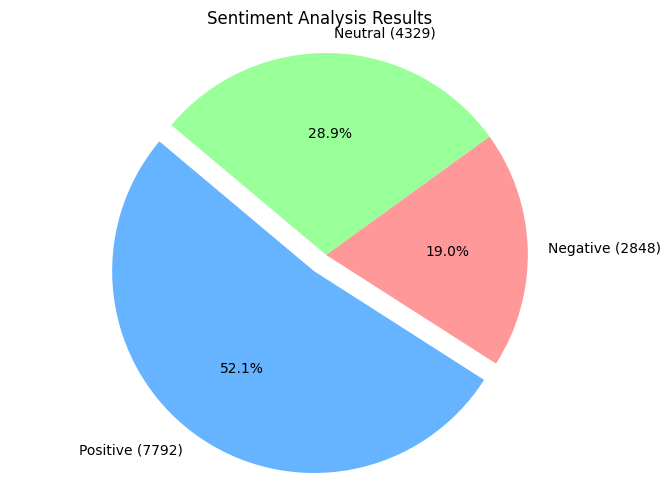

In [ ]:
import matplotlib.pyplot as plt

# Calculate sentiment percentages and counts based on your sentiment analysis results
positive_count = (df['Sentiment_Class'] == 'positive').sum()
negative_count = (df['Sentiment_Class'] == 'negative').sum()
neutral_count = (df['Sentiment_Class'] == 'neutral').sum()

positive_percentage = (positive_count / len(df)) * 100
negative_percentage = (negative_count / len(df)) * 100
neutral_percentage = (neutral_count / len(df)) * 100

# Data for the pie chart
labels = [
    f'Positive ({positive_count})',
    f'Negative ({negative_count})',
    f'Neutral ({neutral_count})'
]
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Colors for each sentiment category
explode = (0.1, 0, 0)  # Explode the 'Positive' slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
plt.title('Sentiment Analysis Results')

# Show the pie chart
plt.show()


Accuracy: 0.6959
Precision: 0.6811
Recall: 0.6959
F1-Score: 0.6531


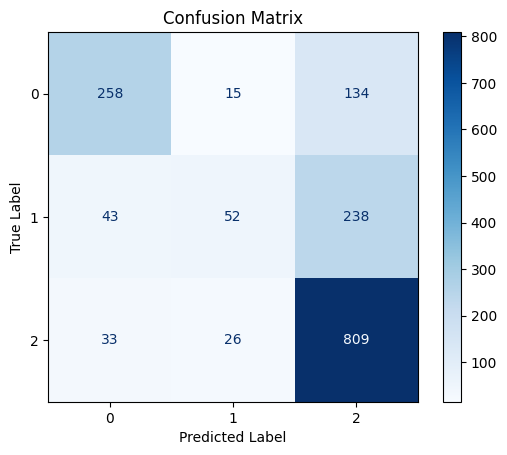

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Set plot labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Annotate the plot with metrics
#plt.gca().text(0.9, -0.25, f'Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-Score: {f1:.4f}',
               #fontsize=10, transform=plt.gca().transAxes)

# Show the plot
plt.show()


In [ ]:
SentiClass = df.copy()  # Create a copy of the cleaned DataFrame

In [ ]:
SentiClass.to_csv('SentiClass.csv', index=False)  # Export to CSV without the index column

In [ ]:
from google.colab import files
files.download('SentiClass.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>